In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, model_selection
from joblib import dump, load
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import gc
import pickle
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import shap
from scipy.stats import hmean


pd.set_option('display.max_columns', None)

# Load data

In [2]:
#df = pd.read_csv('clean_data1.csv')
df = pd.read_csv('clean_data2.csv')

df = df.drop("CODE_GENDER_M", axis = 1)

In [3]:
df.shape

(122761, 52)

Proportion of accepted and rejected proposal

In [4]:
df["TARGET"].value_counts(normalize=True)*100

0    90.499426
1     9.500574
Name: TARGET, dtype: float64

In [5]:
for col in ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "CREDIT_MEAN_OVERDUE_active", 
 "CREDIT_MEAN_active", "CREDIT_MEAN_OVERDUE_sold", "CREDIT_MEAN_sold",
"CREDIT_MEAN_OVERDUE_closed", "CREDIT_MEAN_closed", "CREDIT_ask"]:
    df[col] = np.log10(df[col]+1)

In [6]:
df.head()

SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_ANNUITY        AGE  \
0      100002       1          5.306427     4.392723  25.956104   
1      100008       0          4.995640     4.439625  46.477366   
2      100009       0          5.232999     4.615971  37.799726   
3      100014       0          5.051156     4.325885  27.975309   
4      100016       0          4.829310     3.769562  36.869684   

   YEARS_EMPLOYED  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0        1.747599          0.0              1.0   
1        4.356653          0.0              2.0   
2        8.587106         17.0              3.0   
3        1.862826          0.0              3.0   
4        7.454047          0.0              2.0   

   NAME_EDUCATION_TYPE_Higher education  \
0                                     0   
1                                     0   
2                                     1   
3                                     1   
4                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Other  \
0                                      0                          0   
1                                      0                          0   
2                                      0                          0   
3                                      0                          0   
4                                      0                          0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  \
0                                                  1   
1                                                  1   
2                                                  0   
3                                                  0   
4                                                  1   

   NAME_FAMILY_STATUS_Civil marriage  NAME_FAMILY_STATUS_Married  \
0                                  0                           0   
1                                  0                           1   
2                                  0                           1   
3                                  0                           1   
4                                  0                           1   

   NAME_FAMILY_STATUS_Separated  NAME_FAMILY_STATUS_Single / not married  \
0                             0                                        1   
1                             0                                        0   
2                             0                                        0   
3                             0                                        0   
4                             0                                        0   

   NAME_FAMILY_STATUS_Widow  NAME_CONTRACT_TYPE_Cash loans  \
0                         0                              1   
1                         0                              1   
2                         0                              1   
3                         0                              1   
4                         0                              1   

   NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  \
0                                   0              1   
1                                   0              1   
2                                   0              0   
3                                   0              0   
4                                   0              0   

   OCCUPATION_TYPE_Accountants  OCCUPATION_TYPE_Core staff  \
0                            0                           0   
1                            0                           0   
2                            1                           0   
3                            0                           1   
4                            0                           0   

   OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_HR staff  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0               

In [7]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
cat = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE" or column[:4] == "FLAG":
        cat.append(column)
    else:
        col.append(column)

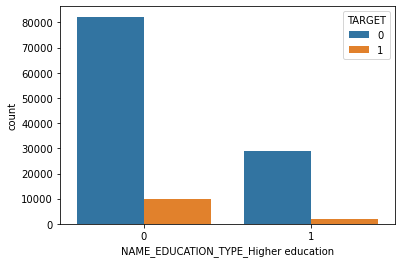

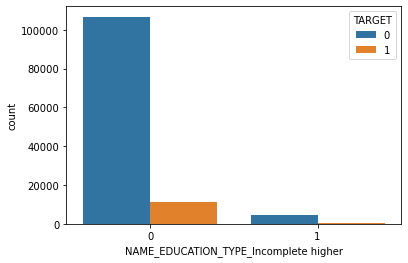

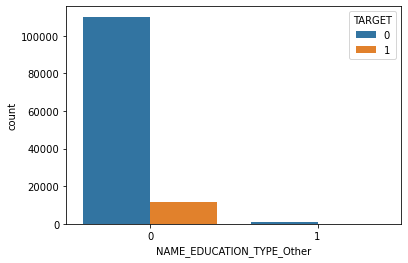

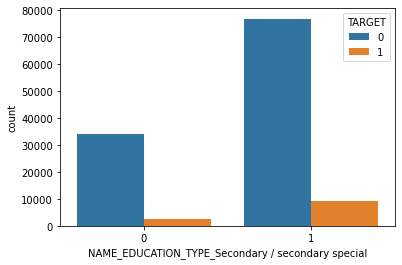

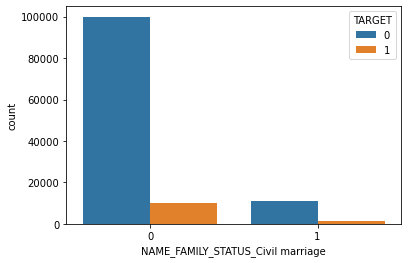

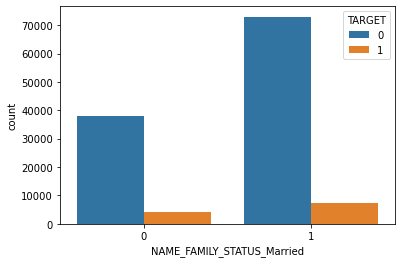

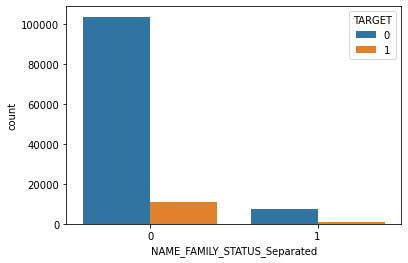

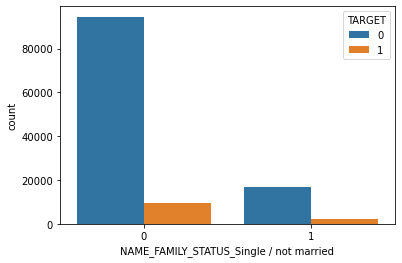

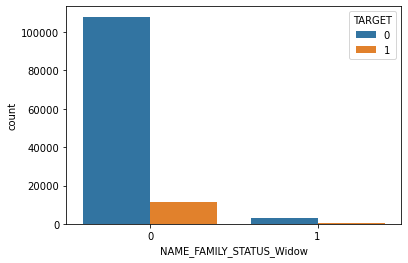

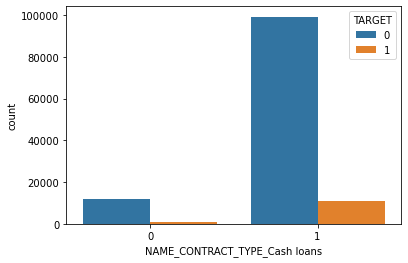

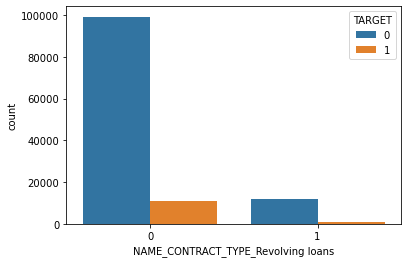

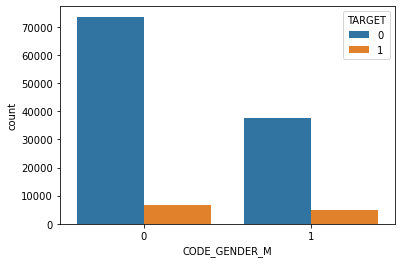

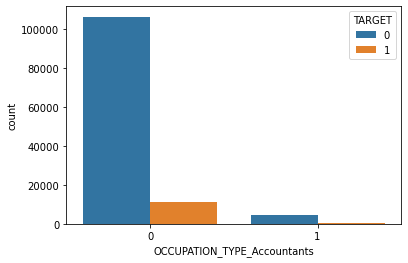

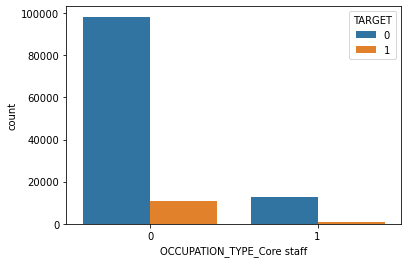

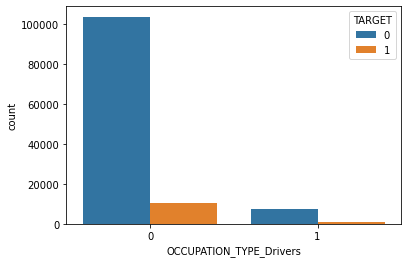

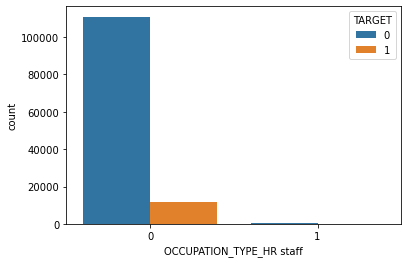

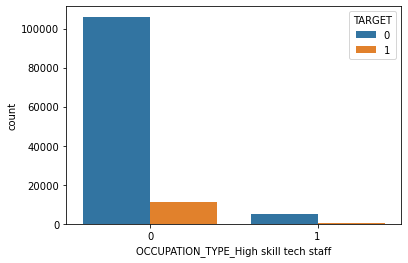

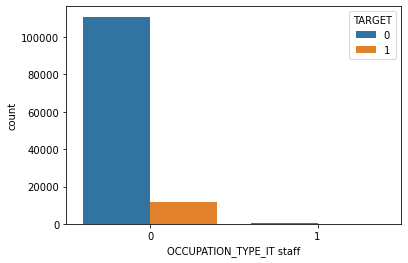

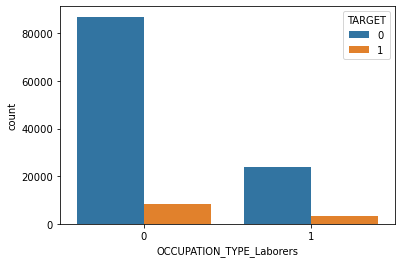

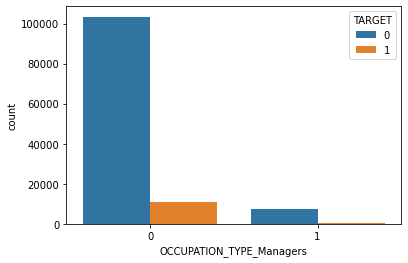

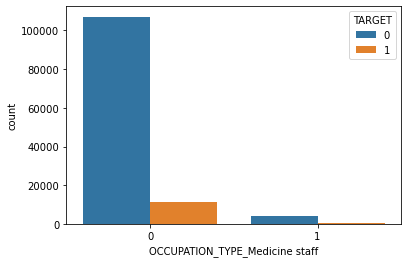

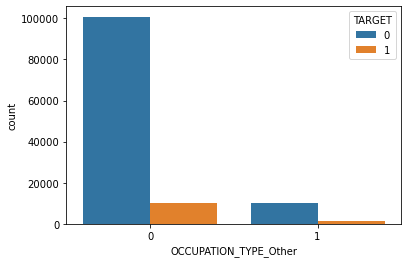

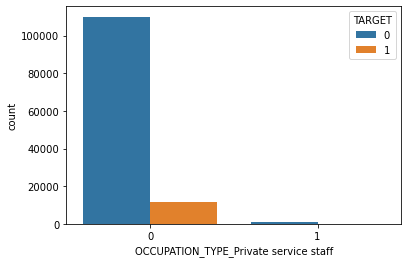

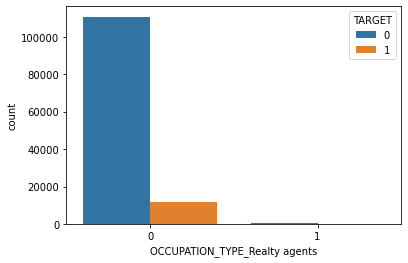

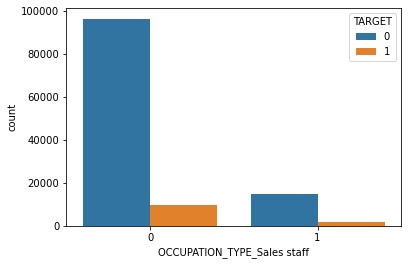

In [8]:
for column in cat:
    sns.countplot(x=column, hue="TARGET", data=df)
    plt.show()

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


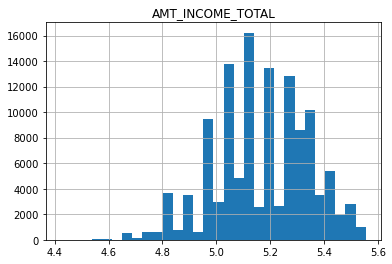

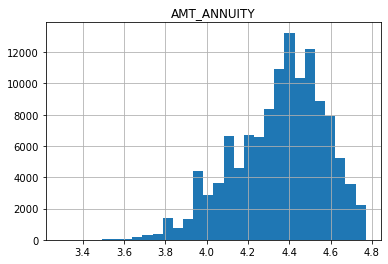

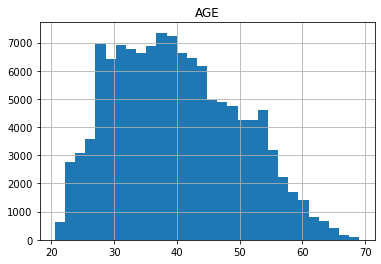

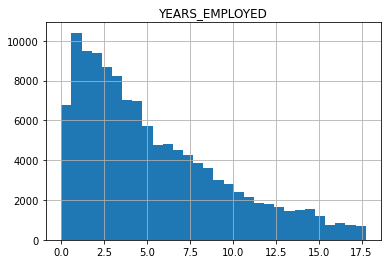

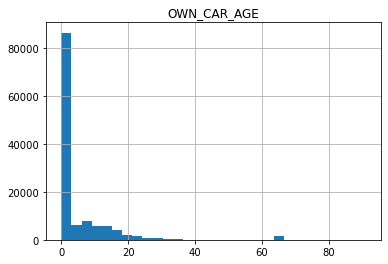

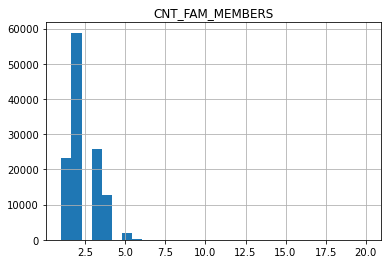

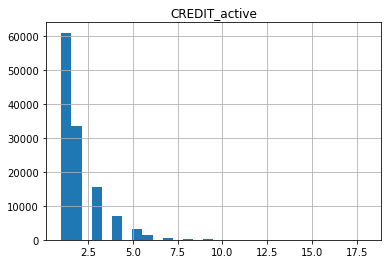

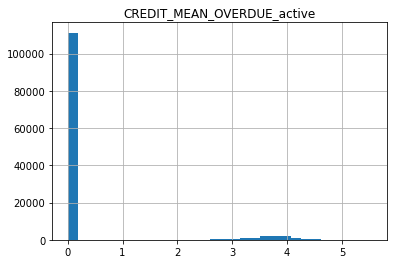

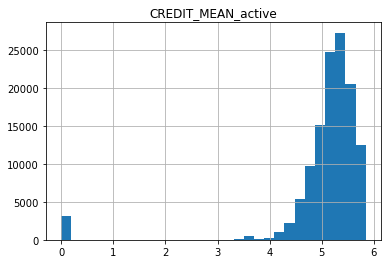

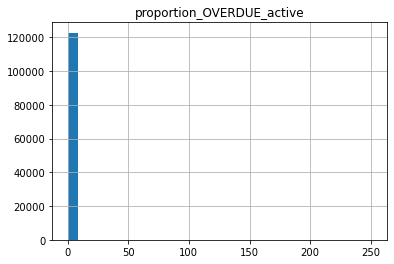

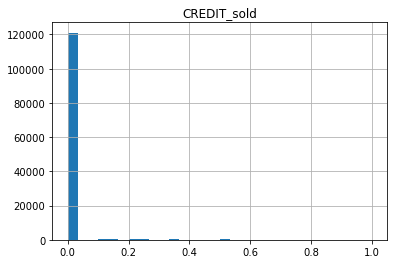

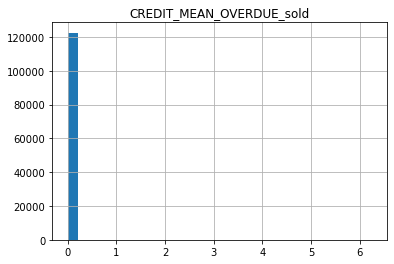

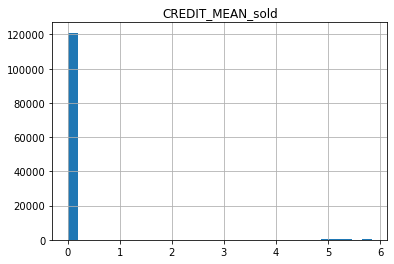

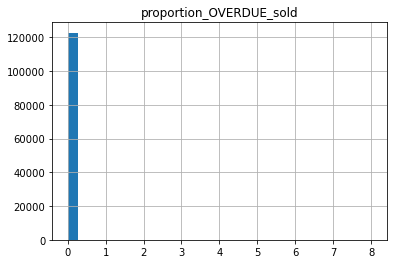

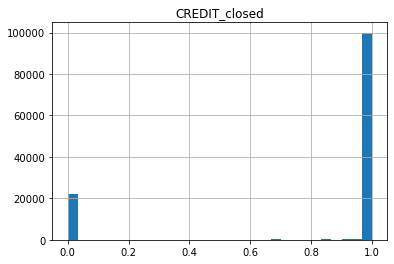

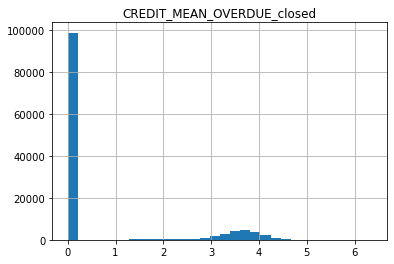

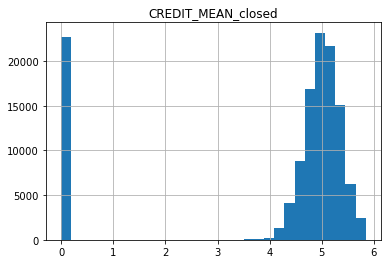

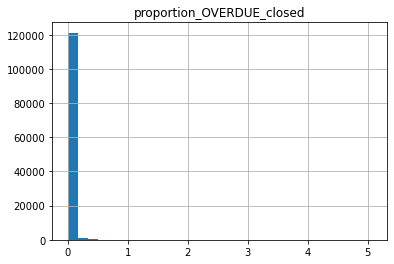

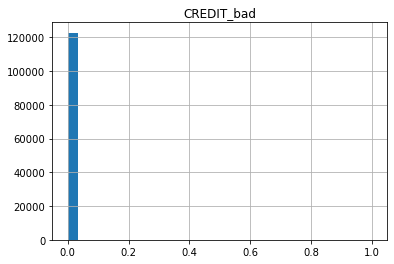

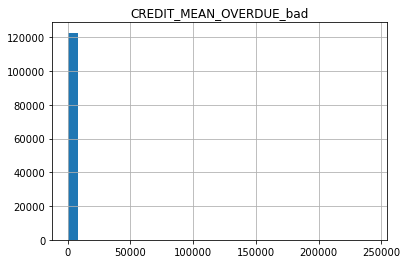

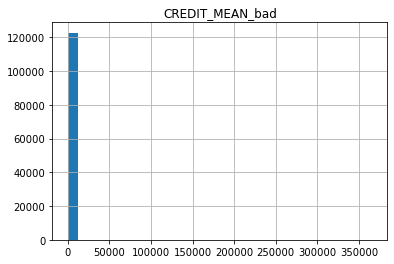

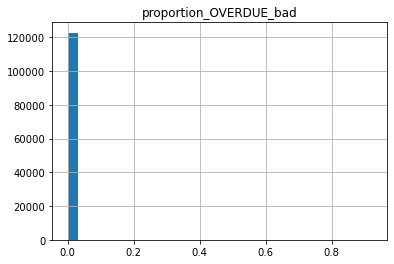

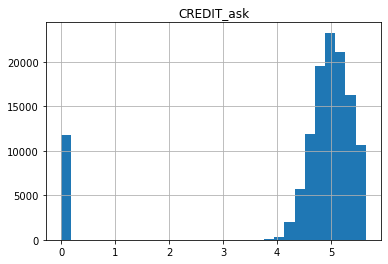

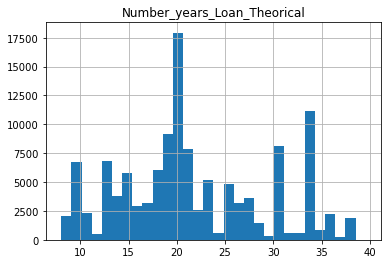

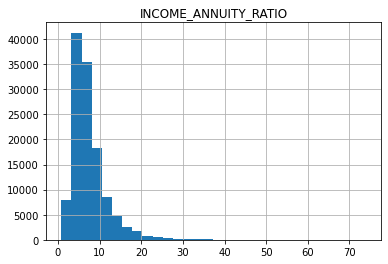

In [9]:
for i in range(len(col)):
    data.hist(col[i], bins = 30)

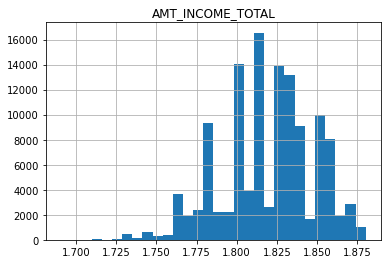

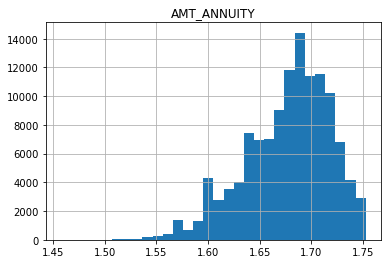

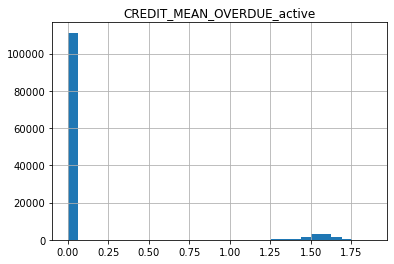

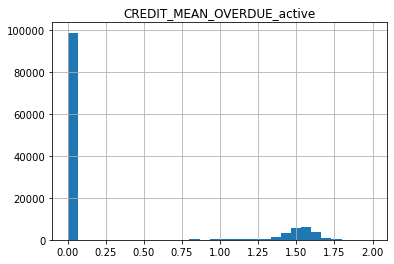

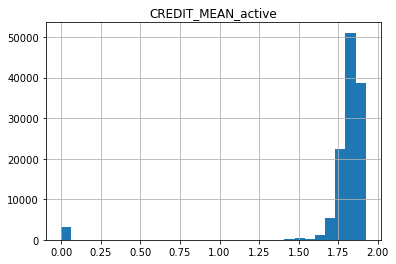

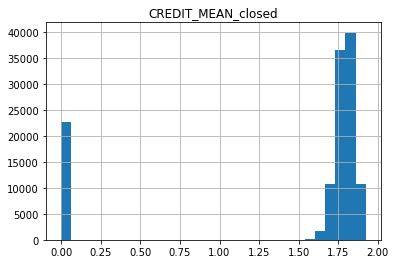

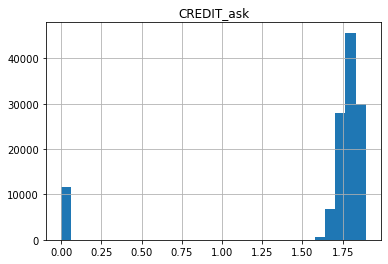

In [10]:
#apply log to flat distribution
np.log(data["AMT_INCOME_TOTAL"]+1).hist(bins = 30)
plt.title("AMT_INCOME_TOTAL")
plt.show()
np.log(data["AMT_ANNUITY"]+1).hist(bins = 30)
plt.title("AMT_ANNUITY")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_active")
plt.show()
np.log(data["CREDIT_MEAN_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_closed")
plt.show()
np.log(data["CREDIT_ask"]+1).hist(bins = 30)
plt.title("CREDIT_ask")
plt.show()

# Correlation matrix

<AxesSubplot:>

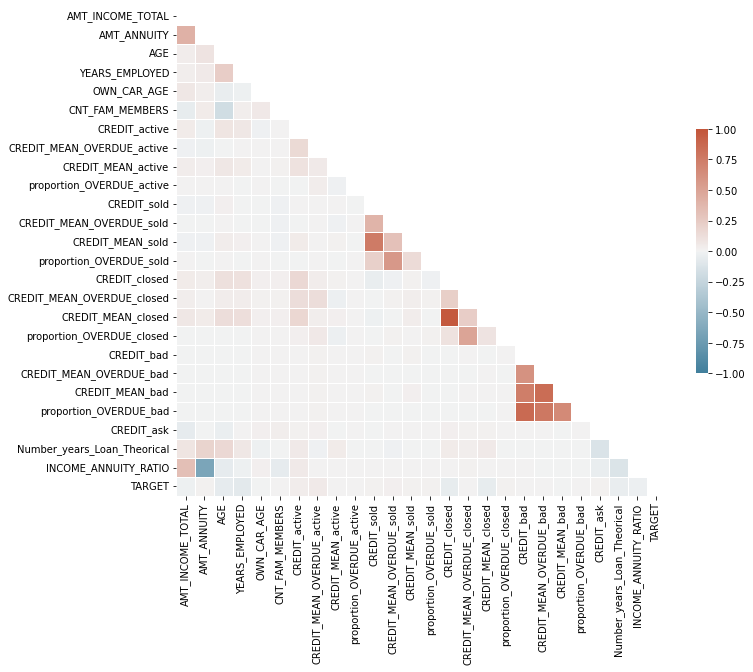

In [11]:
col.append("TARGET")
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising.
TARGET seem not correlated with other features...

# Candidat's sex

In [12]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.66/0.34'

In [13]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.58/0.42'

To avoid any bias due to candidat's sex, **"CODE_GENDER_M"** is removed.

In [14]:
df = df.drop("CODE_GENDER_M", axis = 1)
target = df[["TARGET"]]
data = df.iloc[:,2:]

# Education type

In [15]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [16]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Higher education                 1898
NAME_EDUCATION_TYPE_Incomplete higher                 454
NAME_EDUCATION_TYPE_Other                             158
NAME_EDUCATION_TYPE_Secondary / secondary special    9153
dtype: int64

<AxesSubplot:ylabel='None'>

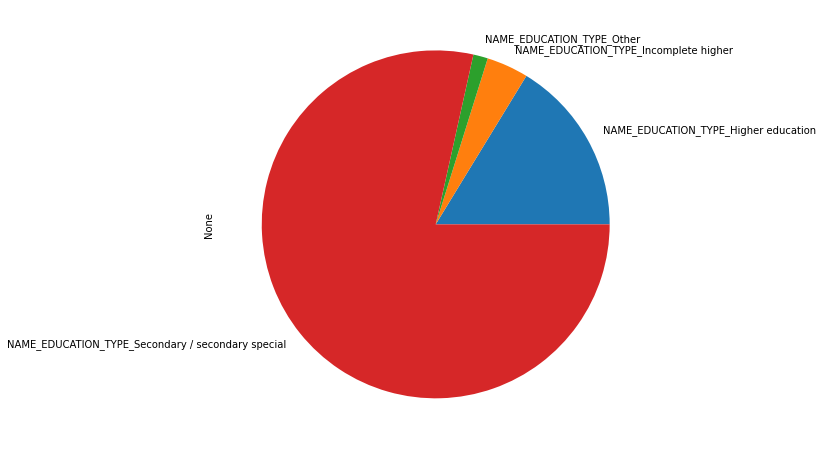

In [17]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [18]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Higher education                 28887
NAME_EDUCATION_TYPE_Incomplete higher                 4372
NAME_EDUCATION_TYPE_Other                             1011
NAME_EDUCATION_TYPE_Secondary / secondary special    76828
dtype: int64

<AxesSubplot:ylabel='None'>

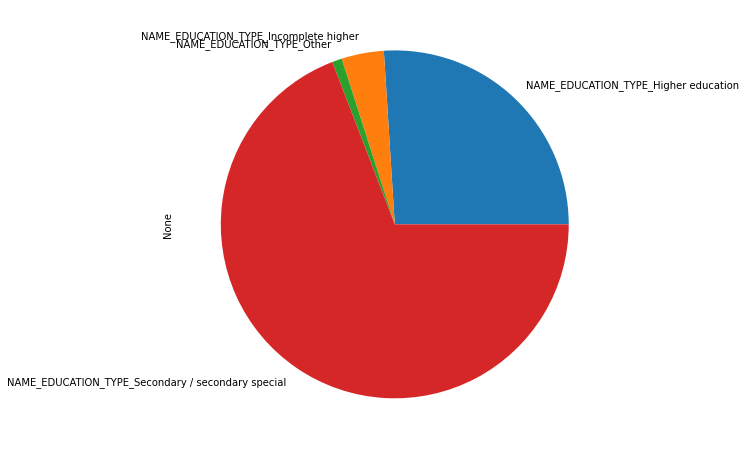

In [19]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [20]:
len("NAME_FAMILY_STATUS")

18

In [21]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [22]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage          1386
NAME_FAMILY_STATUS_Married                 7319
NAME_FAMILY_STATUS_Separated                732
NAME_FAMILY_STATUS_Single / not married    2006
NAME_FAMILY_STATUS_Widow                    220
dtype: int64

<AxesSubplot:ylabel='None'>

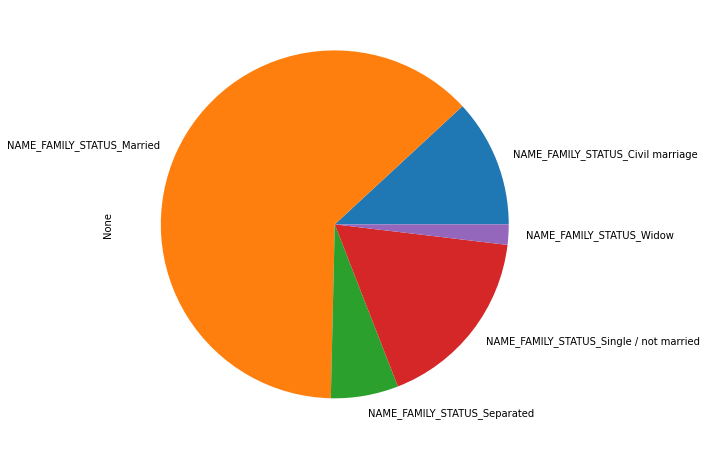

In [23]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [24]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage          11138
NAME_FAMILY_STATUS_Married                 72930
NAME_FAMILY_STATUS_Separated                7304
NAME_FAMILY_STATUS_Single / not married    16607
NAME_FAMILY_STATUS_Widow                    3119
dtype: int64

<AxesSubplot:ylabel='None'>

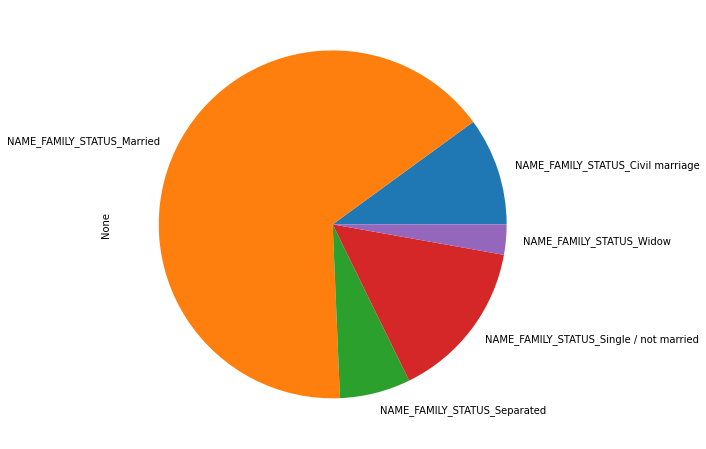

In [25]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Occupation type

In [26]:
len("OCCUPATION_TYPE")

15

In [27]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [28]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               262
OCCUPATION_TYPE_Core staff                987
OCCUPATION_TYPE_Drivers                  1018
OCCUPATION_TYPE_HR staff                   19
OCCUPATION_TYPE_High skill tech staff     372
OCCUPATION_TYPE_IT staff                   16
OCCUPATION_TYPE_Laborers                 3124
OCCUPATION_TYPE_Managers                  558
OCCUPATION_TYPE_Medicine staff            348
OCCUPATION_TYPE_Other                    1316
OCCUPATION_TYPE_Private service staff      78
OCCUPATION_TYPE_Realty agents              27
OCCUPATION_TYPE_Sales staff              1722
dtype: int64

In [29]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               4587
OCCUPATION_TYPE_Core staff               12855
OCCUPATION_TYPE_Drivers                   7399
OCCUPATION_TYPE_HR staff                   251
OCCUPATION_TYPE_High skill tech staff     5084
OCCUPATION_TYPE_IT staff                   219
OCCUPATION_TYPE_Laborers                 24100
OCCUPATION_TYPE_Managers                  7686
OCCUPATION_TYPE_Medicine staff            4058
OCCUPATION_TYPE_Other                    10323
OCCUPATION_TYPE_Private service staff     1120
OCCUPATION_TYPE_Realty agents              337
OCCUPATION_TYPE_Sales staff              14661
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

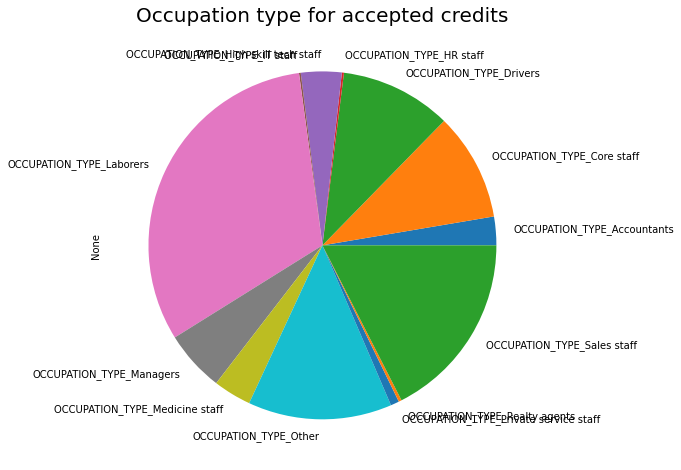

In [30]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

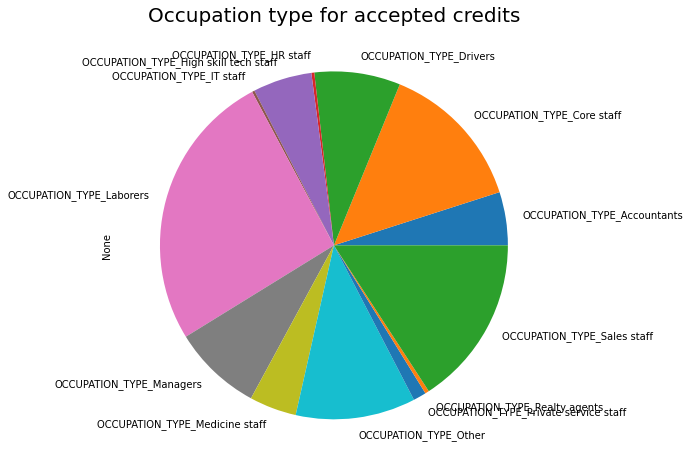

In [31]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Machin learning

## Scoring choice

We want to prevent **bad loan**, It is important to minimize false negative.

Sensibility (or recall) informs about **true positives** (*tp*) find among all **true positive** values (*tp* and *fn*). However it doesn't inform about **true negative** rate.

sensibility = $\frac{tp}{tp + fn}$	

However **Precision** take in count wrong prediction. Precision value corresponds to rate of **true positive values** find among all **positive prediction** (*tp* and *fp*). 

precision = $\frac{tp}{tp + fp}$	

In other hand specificitiy informs about **true negative** (*tn*) rate amoung **true negative** values (*tn* and *fp*).

specificity = $\frac{tn}{tn + fp}$	

Because we have unbalanced data, these metric are note efficient as scoring function.

F-score is an harmonic mean of precision and sensibility. It is a measure of a test's accuracy.

F-score = 2 * $\frac{sensibility * precision}{sensibility + precision}$	= $\frac{tp}{tp + 0.5 * (fp + fn)}$

F$_{\beta}$ score is F-score weighted

In [32]:
def f_beta_score(recall, precision, beta = 1.5):
    tmp = (1+beta**2) + ((precision*recall)/( (beta**2 * precision) + recall))
    if isinstance(tmp, float):
        return tmp
    elif isinstance(tmp, int):
        return tmp
    else:
        tmp[np.isnan(tmp)] = 0
        return tmp

In [33]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
def score_regression(y_test, y_pred, verbose = True):
    """
    Evaluate prediction by computing sensibility,
    specificity, precision, accurary and F-mesure
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    score = {}
    score["sensibility"] = tp/(tp+fn)
    score["specificity"] = tn/(fp+tn)
    if tp+fp == 0:
        score["precision"] = 0
    else:
        score["precision"] = tp/(tp+fp)
    score["accuracy"] = (tp+tn)/(tn+fn+tp+fp)
    if score["sensibility"] + score["precision"] == 0:
        score["f_mesure"] = 0
        score["fbeta_mesure"] = 0
    else:
        score["f_mesure"] = 2 * (score["precision"] * score["sensibility"]
        )/(score["sensibility"] + score["precision"])
        score["fbeta_mesure"] = fbeta_score(np.ravel(y_test), np.ravel(y_pred), beta=1.5)
    #To favorise TRUE positif over FALSE negatif we use hamonic mean of sensibility and specificity with
    #a correction on sensibility to penalize more specificity
    score["harmonic_error"] = (2 * 
                               score["sensibility"] * score["specificity"] 
                              )/(score["sensibility"]  + score["specificity"] )
    score["harmonic_error1"] = (2 * 
                               score["sensibility"] * score["specificity"] 
                              )/(0.7 * score["sensibility"]  + score["specificity"] )
    if verbose:
        print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
        print("Sensibility (rate of true positif) {0}".format(score["sensibility"]))
        print("Specificity (rate of true negatif) {0:.3f}".format(score["specificity"]))
        #custom score
        print("Hamonic score {0:.3f}".format(score["harmonic_error"]))
        print("Hamonic score with correction {0:.3f}".format(score["harmonic_error1"]))
        if score["precision"] == 0:
            print("Denominator is zero. impossible to compute precision ! Change ratio True and False")
        else:
            print("Precision (proportion of correct prediction of positif) {0:.3f}".format(score["precision"]))
        print("Accurary (proportion of correct prediction) {0:.3f}".format(score["accuracy"]))
        if score["f_mesure"] == 0:
            print("Denominator is zero. impossible to compute F-mesure ! Change ratio True and False")
            print("F beta is zero. impossible to compute F-mesure ! Change ratio True and False\n")
        else:
            print("F-mesure {0:.3f}".format(score["f_mesure"]))
            print("F Beta-mesure {0:.3f}\n".format(score["fbeta_mesure"]))
    return score

In [34]:
def process_logisitic_reg(X, Y, n_split = 5, display = True, class_weight = 'balanced'):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = None, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        lr = LogisticRegression(C=10, max_iter = 100000, multi_class = 'ovr', class_weight = class_weight).fit(X_train, np.ravel(y_train))
        y_pred = lr.predict(X_test)
        mdl.append(lr)
        scores.append(score_regression(y_test, y_pred, display))
    return mdl, scores

In [35]:
def process_random_model(X, Y, n_split = 5, display = True):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = None, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rng = np.random.default_rng()
        y_pred = rng.integers(low = 0, high = 1, size=len(y_test), endpoint=True)
        scores.append(score_regression(y_test, y_pred, display))
    return scores

## Random model

In [36]:
%%time
#rng = np.random.default_rng()
#rng.integers(low = 0, high = 1, size=10, endpoint=True)
process_random_model(data.copy().to_numpy(), target.copy().to_numpy())

TN: 11094.0, FP: 11126.0, FN: 1168.0, TP: 1165.0
Sensibility (rate of true positif) 0.4993570510072868
Specificity (rate of true negatif) 0.499
Hamonic score 0.499
Hamonic score with correction 0.587
Precision (proportion of correct prediction of positif) 0.095
Accurary (proportion of correct prediction) 0.499
F-mesure 0.159
F Beta-mesure 0.216

TN: 11086.0, FP: 11133.0, FN: 1180.0, TP: 1153.0
Sensibility (rate of true positif) 0.4942134590655808
Specificity (rate of true negatif) 0.499
Hamonic score 0.497
Hamonic score with correction 0.584
Precision (proportion of correct prediction of positif) 0.094
Accurary (proportion of correct prediction) 0.498
F-mesure 0.158
F Beta-mesure 0.214

TN: 11231.0, FP: 10988.0, FN: 1173.0, TP: 1160.0
Sensibility (rate of true positif) 0.4972138876982426
Specificity (rate of true negatif) 0.505
Hamonic score 0.501
Hamonic score with correction 0.589
Precision (proportion of correct prediction of positif) 0.095
Accurary (proportion of correct prediction

[{'sensibility': 0.4993570510072868,
  'specificity': 0.4992799279927993,
  'precision': 0.09478480188756,
  'accuracy': 0.49928725613977926,
  'f_mesure': 0.15932713347921224,
  'fbeta_mesure': 0.21586066333148046,
  'harmonic_error': 0.4993184865220042,
  'harmonic_error1': 0.5874415195136155},
 {'sensibility': 0.4942134590655808,
  'specificity': 0.4989423466402628,
  'precision': 0.0938466547289598,
  'accuracy': 0.4984929944607364,
  'f_mesure': 0.1577399274916205,
  'fbeta_mesure': 0.21369812235354502,
  'harmonic_error': 0.4965666446104761,
  'harmonic_error1': 0.5837055877467583},
 {'sensibility': 0.4972138876982426,
  'specificity': 0.5054682929024709,
  'precision': 0.09548896937767534,
  'accuracy': 0.5046839361355491,
  'f_mesure': 0.16020993025343552,
  'fbeta_mesure': 0.21670091537455635,
  'harmonic_error': 0.5013071138287519,
  'harmonic_error1': 0.5889175174139282},
 {'sensibility': 0.5055746140651801,
  'specificity': 0.5057155715571557,
  'precision': 0.0969412925505

## Logistic regression 

### F-beta modelization

In [37]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = []
precision = []

y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
recall.append(recall_score(y_true, y_pred, zero_division = 0))
precision.append(precision_score(y_true, y_pred, zero_division = 0))
for i in range(10):
    y_pred[i] = 1
    recall.append(recall_score(y_true, y_pred, zero_division = 0))
    precision.append(precision_score(y_true, y_pred, zero_division = 0))
for i in range(10):
    y_pred[i] = 0
    recall.append(recall_score(y_true, y_pred, zero_division = 0))
    precision.append(precision_score(y_true, y_pred, zero_division = 0))


In [38]:
def return_point3D(recall, precision, fbeta, name, col):
    return  go.Scatter3d(x = recall, y = precision, z = fbeta, 
                         mode='markers', marker={
                             'size': 5,
                             "color" : [col],
                             'opacity': 0.7},
                         name = name)

In [39]:
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

fbeta = f_beta_score(np.array(recall), np.array(precision))
trace1 = return_point3D(recall, precision, fbeta, 'Beta = 1', 3)

fbeta = f_beta_score(np.array(recall), np.array(precision), 2)
trace2 = return_point3D(recall, precision, fbeta, 'Beta = 2',6)

fbeta = f_beta_score(np.array(recall), np.array(precision), 0.5)
trace3 = return_point3D(recall, precision, fbeta, 'Beta = 0.25', 1)

layout = go.Layout(
   title = 'F-Beta score as function of Beta')


elements = [trace1, trace2, trace3]

plot_figure = go.Figure(data=elements, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

<ipython-input-32-9b8892717924>:2: RuntimeWarning:

invalid value encountered in true_divide



### grid search

In [40]:
def harmonic_error(y, y_pred, coef = 0.7):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    score = {}
    sensibility = tp/(tp+fn)
    specificity = tn/(fp+tn)
    return (sensibility * specificity)/(coef * sensibility  + specificity )

def sensibility_score(y, y_pred, coef = 0.7):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    if tp+fn == 0:
        return 0
    else:
        return tp/(tp+fn)

def specificity_score(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    if fp+tn == 0:
        return 0
    else:
        return tn/(fp+tn)

def custom_accuracy_score(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    return (tp + tn)/(tp+1.25*fn+0.75*fp+tn)

In [41]:
%%time
from sklearn.metrics import f1_score
grid={"C":[0.01, 0.1, 1], 'class_weight' : [None, "balanced"]}
scorers = {
    'harmonic_error': make_scorer(harmonic_error),
    'beta_score': make_scorer(fbeta_score, beta=1.5),
    'f1_score' : make_scorer(f1_score),
    'recall_score': make_scorer(recall_score, zero_division = 0),
    'precision_score': make_scorer(precision_score, zero_division = 0),
    'sensibility_score': make_scorer(sensibility_score),
    'specificity_score': make_scorer(specificity_score),
    'custom_accuracy_score': make_scorer(custom_accuracy_score)
}
#fbeta > 1  favors recall

Wall time: 0 ns


In [42]:
%%time
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3)
logreg=LogisticRegression(max_iter = 15000, multi_class = 'ovr')
logreg_cv=GridSearchCV(logreg, grid,cv=5, scoring= scorers, refit = 'harmonic_error')
logreg_cv.fit(x_train,np.ravel(y_train))
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("harmonic_error :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'balanced'}
harmonic_error : 0.3559992536394742
Wall time: 4min 27s


In [43]:
logreg_cv.cv_results_['mean_test_sensibility_score']

array([0.        , 0.6133909 , 0.        , 0.61412395, 0.        ,
       0.61424635])

In [44]:
logreg_cv.cv_results_['mean_test_specificity_score']

array([1.        , 0.59278685, 0.99998714, 0.59282544, 0.99997428,
       0.5928769 ])

In [45]:
logreg_cv.cv_results_['mean_test_custom_accuracy_score']

array([0.88372093, 0.64850757, 0.88371208, 0.64862895, 0.88370322,
       0.64868622])

In [46]:
logreg_cv.cv_results_['mean_test_harmonic_error']

array([0.        , 0.35568364, 0.        , 0.35593686, 0.        ,
       0.35599925])

In [47]:
logreg_cv.cv_results_['mean_test_beta_score']

array([0.        , 0.29611996, 0.        , 0.29645373, 0.        ,
       0.2965338 ])

In [48]:
logreg_cv.cv_results_['mean_test_recall_score']

array([0.        , 0.6133909 , 0.        , 0.61412395, 0.        ,
       0.61424635])

In [49]:
logreg_cv.cv_results_['mean_test_precision_score']

array([0.        , 0.13685991, 0.        , 0.13700859, 0.        ,
       0.13705001])

In [50]:
logreg_cv.cv_results_['mean_test_f1_score']

array([0.        , 0.2237826 , 0.        , 0.22403082, 0.        ,
       0.22409467])

In [51]:
model = logreg_cv.best_estimator_

## Explain the linear model

In [52]:
explainer = shap.LinearExplainer(model, x_train, nsamples=10000, feature_perturbation = 'interventional')
shap_values = explainer.shap_values(x_test)
X_test_array = x_test

C:\Users\jayse\anaconda3\lib\site-packages\shap\explainers\_linear.py:62: UserWarning:

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)

C:\Users\jayse\anaconda3\lib\site-packages\shap\explainers\_linear.py:174: UserWarning:

Setting nsamples has no effect when feature_perturbation = 'interventional'!



### Summarize the effect of all the features

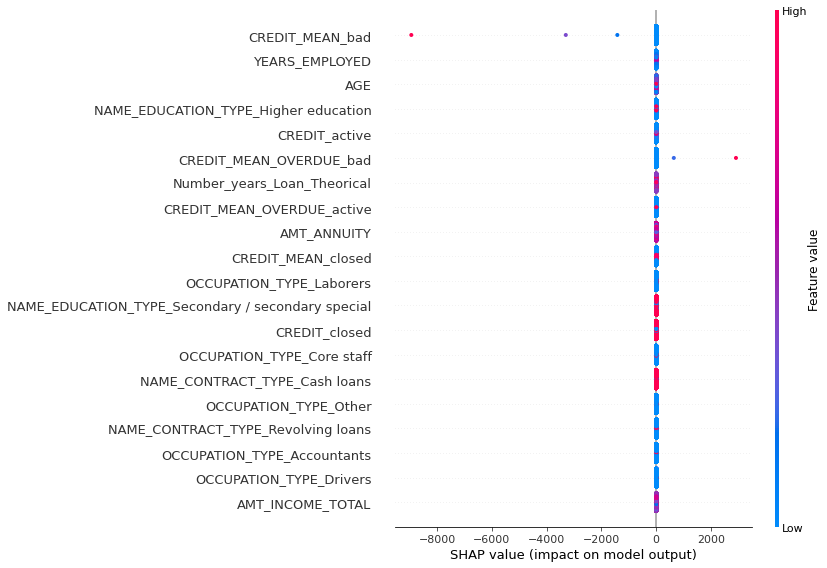

In [53]:
shap.summary_plot(shap_values, X_test_array, feature_names=data.columns)

CREDIT_MEAN_bad's value is too high. Do get a better view, it is not display.

In [54]:
for cpt, col in enumerate(data.columns):
    if col == "CREDIT_MEAN_bad" or col == "CREDIT_MEAN_OVERDUE_bad":
        print(cpt)

43
44


In [55]:
ind = []
for i in range(49):
    if i == 44 or i == 43:
        continue
    else:
        ind.append(i)

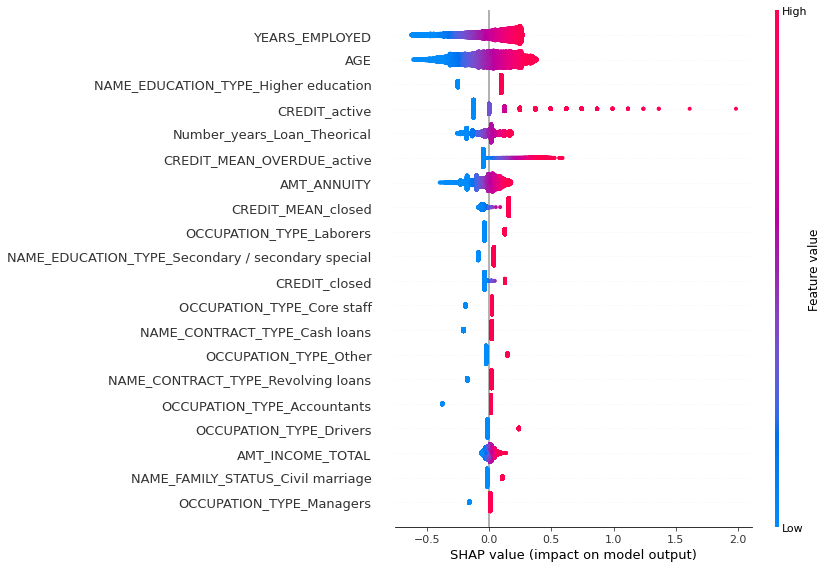

In [56]:
shap.summary_plot(shap_values[:,ind], shap_values[:,ind], feature_names=data.columns[ind])

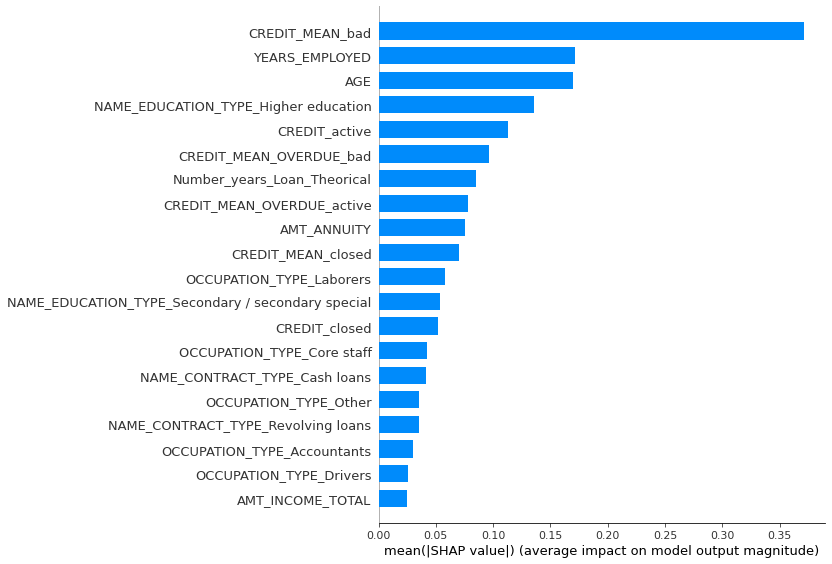

In [57]:
shap.summary_plot(shap_values, x_test, feature_names=data.columns, plot_type = 'bar')

Example with a rejected loan

In [58]:
shap.initjs()
bad_customer = np.where(model.predict(x_test) == 1)[0][0]
ind = bad_customer
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], x_test[ind,:],
    feature_names=data.columns
)

Job activity, AMT annuity and numer of years to pay loan contribute to rejected the loan

Example with a accepted loan

In [59]:
shap.initjs()
accepted_customer = np.where(model.predict(x_test) == 0)[0][0]
ind = accepted_customer
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], x_test[ind,:],
    feature_names=data.columns
)

## Results

### ROC curve

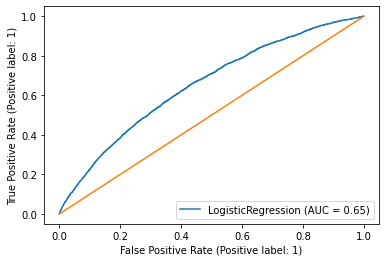

In [60]:
metrics.plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()


The logisitic regression model is not effecient to reject bad loan. It can not be used and we must improve it.
The high score is due to the poor number of true label.

In [61]:
tmp = target.sum() / target.shape[0] *100
tmp2 = target.sum() / (target.shape[0]-target.sum()) *100
print("The proportion of True label is {0:.2f}%. It is {1} time less than False.\n\
New datasets are created with less accepted loan.".format(tmp[0], int(tmp2)))

The proportion of True label is 9.50%. It is 10 time less than False.
New datasets are created with less accepted loan.


# Data equilibration

The number of rejected loan is low compared to accepted loan. Moreover feature are quite equilibrate beetween 2 labels.
True label are increased with data augmentation (adding noises). To be sure there is no overfitting, an unbiased sample will be used. 

In [62]:
def add_noise(X, shape = None, dispersion = 1):
    """
    Generate new samples and add to data given.
    Samples generated follow distribution center to X's mean
    with X's standard deviation
    Arguments:
        _X array
        _Data dimension (which dimension)
        _dispersion: factor to scale standard deviation
    Return
        Array with new data
    """
    std = np.std(X, axis = 0)/dispersion
    means = np.mean(X, axis = 0)
    if shape is None:
        lines = np.shape(X)[0]
        col = np.shape(X)[1]
        Xnoisy =  np.zeros((lines, col))
    else:
        Xnoisy =  np.zeros((shape[0], shape[1]))
    for i in range(np.shape(X)[1]):
        noise = np.random.normal(loc=means[i], scale=std[i], size = np.shape(Xnoisy)[0])
        ##convert to int for boolen features
        #Xnoisy[:,i] += noise.astype(int)
        Xnoisy[:,i] += noise
    return Xnoisy

In [63]:
def best_score_model(mdl, scores, metric = "f_mesure"):
    tmp = []
    for i in range(len(scores)):
        tmp.append(scores[i][metric])
    indice = np.where(tmp == np.max(tmp))[0][0]
    return mdl[i], scores[i]

In [64]:
def ratio_false_true(Y, label = 1, ratio = 2):
    """
    For binomila data. Split label 1/0
    and return indice in way that 1/0 has a specific ratio.
    Arguments:
        Y: list of binomial data
        label: label to use (default 1)
        ratio: ratio value between number of 0 and number of 1
        number(0)/number(1)
    Return:
        indices of keep elements
    """
    indice_true = np.where(Y == label)[0]
    indice_false = np.setdiff1d(np.arange(len(Y)), indice_true)
    new_indice_false = np.random.choice(indice_false, int(len(indice_true) * ratio), replace = False)
    indices = np.concatenate([indice_true, new_indice_false])
    return np.sort(indices)

# Training and test dataset

Create a Test validation by taking off 20% of label True and False

In [65]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [66]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [67]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42, sampling_strategy = 0.75, k_neighbors = 10)],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=10000)]])


In [68]:
%%time

param_grid = {'classifier__C':[0.1, 1, 10, 20, 50, 100]}
scorers = {
    'harmonic_error': make_scorer(harmonic_error),
    'beta_score': make_scorer(fbeta_score, beta=1.5),
    'f1_score' : make_scorer(f1_score),
    'recall_score': make_scorer(recall_score, zero_division = 0),
    'precision_score': make_scorer(precision_score, zero_division = 0),
    'sensibility_score': make_scorer(sensibility_score),
    'specificity_score': make_scorer(specificity_score),
    'custom_accuracy_score': make_scorer(custom_accuracy_score)
}

Wall time: 0 ns


In [69]:
%%time
stratified_kfold = StratifiedKFold(n_splits=4,
                                       shuffle=True,
                                       random_state=42)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scorers,
                           cv=stratified_kfold,
                           n_jobs=-1, refit = "harmonic_error")

grid_search.fit(Xtrain, Ytrain)
cv_score = grid_search.best_score_
test_score = grid_search.score(Xtest, Ytest)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')


Cross-validation score: 0.3086176713715138
Test score: 0.3115106081898261
Wall time: 2min 37s


In [70]:
grid_search.cv_results_['mean_test_sensibility_score']

array([0.43079373, 0.43165115, 0.43214111, 0.43238609, 0.43201862,
       0.43165115])

In [71]:
grid_search.cv_results_['mean_test_specificity_score']

array([0.75515636, 0.75501492, 0.75468059, 0.75495062, 0.75471916,
       0.75502777])

In [72]:
grid_search.cv_results_['mean_test_custom_accuracy_score']

array([0.75599768, 0.75599054, 0.75579223, 0.75602796, 0.75580719,
       0.75600039])

In [73]:
grid_search.cv_results_['mean_test_harmonic_error']

array([0.30783745, 0.30825426, 0.30845821, 0.30861767, 0.3084047 ,
       0.30825271])

In [74]:
grid_search.cv_results_['mean_test_beta_score']

array([0.279288  , 0.27971824, 0.27982719, 0.28012031, 0.27977858,
       0.27972513])

In [75]:
grid_search.cv_results_['mean_test_recall_score']

array([0.43079373, 0.43165115, 0.43214111, 0.43238609, 0.43201862,
       0.43165115])

In [76]:
grid_search.cv_results_['mean_test_precision_score']

array([0.15591717, 0.15610017, 0.15606682, 0.15629054, 0.15605378,
       0.15610709])

In [77]:
grid_search.cv_results_['mean_test_f1_score']

array([0.22896263, 0.2292811 , 0.22931389, 0.22959034, 0.22928248,
       0.2292886 ])

In [78]:
grid_search.best_estimator_

Pipeline(steps=[('smote',
                 SMOTE(k_neighbors=10, random_state=42,
                       sampling_strategy=0.75)),
                ['classifier',
                 LogisticRegression(C=20, max_iter=10000, random_state=11)]])

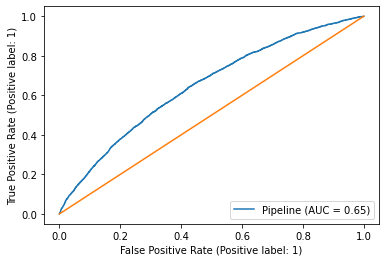

In [79]:
model = grid_search.best_estimator_
metrics.plot_roc_curve(model, Xtest, Ytest)
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()

There is no improvement of prediction with data augmentation

## lightGBM (Light Gradient Boosting Machine)

### LGBMClassifier

In [80]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [81]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [16,24,32],
    'num_leaves': [100, 150, 200], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['goss'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'random_state' : [42],
    'colsample_bytree' : [0.5, 1, 1.5],
    'subsample' : [0.7,1, 1.75],
    'reg_alpha' : [0,0.5,1],
    'reg_lambda' : [0,0.5,1],
    'class_weight' :['balanced'],
    'feature_fraction' : [0.6, 0.7, 1]
    }

params = {'max_depth': -1, 'objective': 'binary', 
          'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
          'subsample_for_bin': 200, 'subsample_freq': 1,
          'colsample_bytree': 0.8, 'min_split_gain': 0.5, 'min_child_weight': 1, 
          'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
          'metric': 'binary', 'n_estimators' :100000}


scorers = {
    'harmonic_error': make_scorer(harmonic_error),
    'beta_score': make_scorer(fbeta_score, beta=1.5),
    'f1_score' : make_scorer(f1_score),
    'recall_score': make_scorer(recall_score, zero_division = 0),
    'precision_score': make_scorer(precision_score, zero_division = 0),
    'sensibility_score': make_scorer(sensibility_score),
    'specificity_score': make_scorer(specificity_score),
    'custom_accuracy_score': make_scorer(custom_accuracy_score)
}

In [82]:
%%time
mod = lgb.LGBMClassifier(**params)
mod.get_params().keys()
grid = GridSearchCV(mod, param_grid=gridParams, verbose=1, cv=5, n_jobs=-1, scoring=scorers, refit = "harmonic_error")
# Run the grid
grid.fit(Xtrain, np.ravel(Ytrain))


Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.35696051        nan ...        nan 0.34989647        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.30606079        nan ...        nan 0.29557719        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.23638079        nan ...        nan 0.22766658        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.57937334        nan ...        nan 0.56565641        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.6
Wall time: 13min 15s


GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                      max_bin=512, metric='binary',
                                      min_child_samples=5, min_child_weight=1,
                                      min_split_gain=0.5, n_estimators=100000,
                                      num_class=1, num_leaves=64,
                                      objective='binary', scale_pos_weight=1,
                                      subsample_for_bin=200, subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['goss'],
                         'class_wei...
                      'custom_accuracy_score': make_scorer(custom_accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'harmonic_error': make_scorer(harmonic_error),
                      'precision_score': make_scorer(precision_score, zero_division=0),
                      'recall_score': m

In [83]:
grid.best_estimator_

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               colsample_bytree=0.5, feature_fraction=0.6, learning_rate=0.005,
               max_bin=512, metric='binary', min_child_samples=5,
               min_child_weight=1, min_split_gain=0.5, n_estimators=32,
               num_class=1, num_leaves=100, objective='binary', random_state=42,
               reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
               subsample_for_bin=200, subsample_freq=1)

In [84]:
grid.best_score_

0.3596801827840307

In [85]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_boosting_type', 'param_class_weight', 'param_colsample_bytree', 'param_feature_fraction', 'param_learning_rate', 'param_n_estimators', 'param_num_leaves', 'param_objective', 'param_random_state', 'param_reg_alpha', 'param_reg_lambda', 'param_subsample', 'params', 'split0_test_harmonic_error', 'split1_test_harmonic_error', 'split2_test_harmonic_error', 'split3_test_harmonic_error', 'split4_test_harmonic_error', 'mean_test_harmonic_error', 'std_test_harmonic_error', 'rank_test_harmonic_error', 'split0_test_beta_score', 'split1_test_beta_score', 'split2_test_beta_score', 'split3_test_beta_score', 'split4_test_beta_score', 'mean_test_beta_score', 'std_test_beta_score', 'rank_test_beta_score', 'split0_test_f1_score', 'split1_test_f1_score', 'split2_test_f1_score', 'split3_test_f1_score', 'split4_test_f1_score', 'mean_test_f1_score', 'std_test_f1_score', 'rank_test_f1_score', 'split0_test_recall_score', '

In [86]:
grid.cv_results_['mean_test_sensibility_score']

array([       nan, 0.57937334,        nan, ...,        nan, 0.56565641,
              nan])

In [87]:
grid.cv_results_['mean_test_specificity_score']

array([       nan, 0.65119349,        nan, ...,        nan, 0.64269387,
              nan])

In [88]:
grid.cv_results_['mean_test_custom_accuracy_score']

array([       nan, 0.69206426,        nan, ...,        nan, 0.68356459,
              nan])

In [89]:
grid.cv_results_['mean_test_harmonic_error']

array([       nan, 0.35696051,        nan, ...,        nan, 0.34989647,
              nan])

In [90]:
grid.cv_results_['mean_test_beta_score']

array([       nan, 0.30606079,        nan, ...,        nan, 0.29557719,
              nan])

In [91]:
grid.cv_results_['mean_test_f1_score']

array([       nan, 0.23638079,        nan, ...,        nan, 0.22766658,
              nan])

In [92]:
cv_score = grid.best_score_
test_score = grid.score(Xtest, Ytest)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.3596801827840307
Test score: 0.3625500420289824


In [93]:
grid.best_estimator_

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               colsample_bytree=0.5, feature_fraction=0.6, learning_rate=0.005,
               max_bin=512, metric='binary', min_child_samples=5,
               min_child_weight=1, min_split_gain=0.5, n_estimators=32,
               num_class=1, num_leaves=100, objective='binary', random_state=42,
               reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
               subsample_for_bin=200, subsample_freq=1)

### Summarize the effect of all the features

In [94]:
model = grid.best_estimator_
explainer = shap.TreeExplainer(model, Xtrain, nsamples=10000, feature_perturbation = 'interventional')
shap_values = explainer.shap_values(Xtest, check_additivity=False)
X_test_array = x_test

 99%|===================| 36513/36829 [01:36<00:00]        

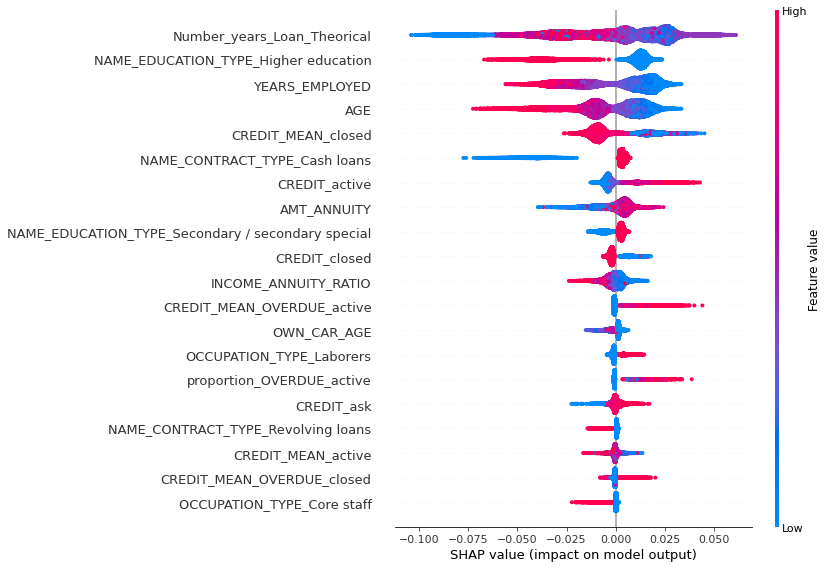

In [95]:
shap.summary_plot(shap_values, Xtest, feature_names=data.columns)

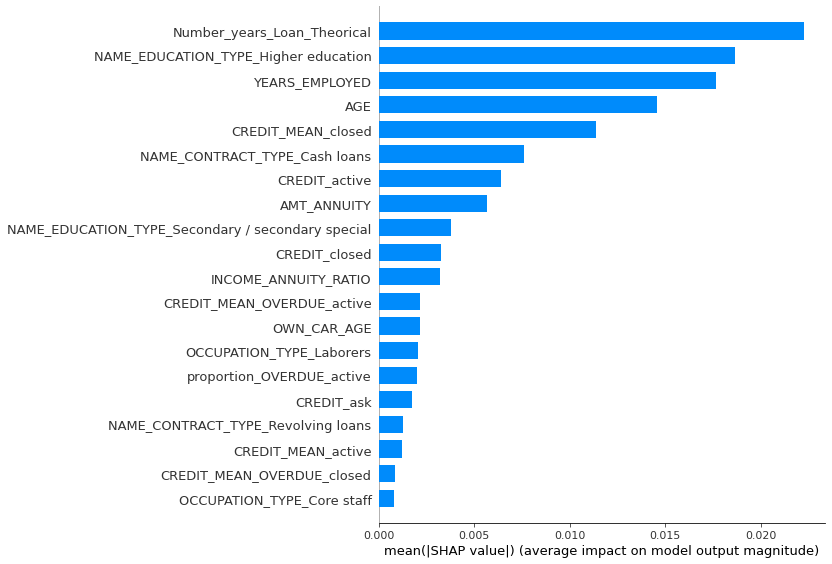

In [96]:
shap.summary_plot(shap_values, X_test_array, feature_names=data.columns, plot_type = 'bar')

Example with a rejected loan

In [97]:
shap.initjs()
bad_customer = np.where(model.predict(x_test) == 1)[0][0]
ind = bad_customer
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], x_test[ind,:],
    feature_names=data.columns
)

Job activity, AMT annuity and numer of years to pay loan contribute to rejected the loan

Example with a accepted loan

In [98]:
shap.initjs()
accepted_customer = np.where(model.predict(x_test) == 0)[0][0]
ind = accepted_customer
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], x_test[ind,:],
    feature_names=data.columns
)

### Features qui contribuent le plus

In [99]:
df_feature_importance = pd.DataFrame({ 'feature': data.columns.to_numpy(),
        'importance': model.feature_importances_,})

In [100]:
df_feature_importance.sort_values('importance', ascending=False)

feature  importance
47                        Number_years_Loan_Theorical         449
2                                                 AGE         358
1                                         AMT_ANNUITY         268
40                                 CREDIT_MEAN_closed         224
3                                      YEARS_EMPLOYED         212
32                                 CREDIT_MEAN_active         174
48                               INCOME_ANNUITY_RATIO         166
46                                         CREDIT_ask         155
30                                      CREDIT_active         153
31                         CREDIT_MEAN_OVERDUE_active         107
0                                    AMT_INCOME_TOTAL          91
33                          proportion_OVERDUE_active          88
15                      NAME_CONTRACT_TYPE_Cash loans          85
41                          proportion_OVERDUE_closed          71
39                         CREDIT_MEAN_OVERDUE_closed          67
4                                         OWN_CAR_AGE          63
23                           OCCUPATION_TYPE_Laborers          45
38                                      CREDIT_closed          44
13            NAME_FAMILY_STATUS_Single / not married          39
19                            OCCUPATION_TYPE_Drivers          39
18                         OCCUPATION_TYPE_Core staff          36
5                                     CNT_FAM_MEMBERS          35
6                NAME_EDUCATION_TYPE_Higher education          33
26                              OCCUPATION_TYPE_Other          22
21              OCCUPATION_TYPE_High skill tech staff          20
29                        OCCUPATION_TYPE_Sales staff          15
9   NAME_EDUCATION_TYPE_Secondary / secondary special          14
24                           OCCUPATION_TYPE_Managers          14
10                  NAME_FAMILY_STATUS_Civil marriage          12
17                        OCCUPATION_TYPE_Accountants          12
11                         NAME_FAMILY_STATUS_Married          12
8                           NAME_EDUCATION_TYPE_Other          11
16                 NAME_CONTRACT_TYPE_Revolving loans           8
25                     OCCUPATION_TYPE_Medicine staff           7
14                           NAME_FAMILY_STATUS_Widow           7
34                                        CREDIT_sold           6
36                                   CREDIT_MEAN_sold           4
12                       NAME_FAMILY_STATUS_Separated           2
42                                         CREDIT_bad           0
45                             proportion_OVERDUE_bad           0
44                                    CREDIT_MEAN_bad           0
43                            CREDIT_MEAN_OVERDUE_bad           0
20                           OCCUPATION_TYPE_HR staff           0
7               NAME_EDUCATION_TYPE_Incomplete higher           0
22                           OCCUPATION_TYPE_IT staff           0
27              OCCUPATION_TYPE_Private service staff           0
37                            proportion_OVERDUE_sold           0
35                           CREDIT_MEAN_OVERDUE_sold           0
28                      OCCUPATION_TYPE_Realty agents           0

In [101]:
#select feature wich explain more than 2% of variability
feat = []
tot = df_feature_importance['importance'].sum()
for cpt, val in enumerate(df_feature_importance['importance']):
    if val >= tot * 0.02:
        feat.append(df_feature_importance.iloc[cpt,0])

In [102]:
feat.append("CNT_FAM_MEMBERS")

In [103]:
feat

['AMT_INCOME_TOTAL',
 'AMT_ANNUITY',
 'AGE',
 'YEARS_EMPLOYED',
 'NAME_CONTRACT_TYPE_Cash loans',
 'CREDIT_active',
 'CREDIT_MEAN_OVERDUE_active',
 'CREDIT_MEAN_active',
 'proportion_OVERDUE_active',
 'CREDIT_MEAN_OVERDUE_closed',
 'CREDIT_MEAN_closed',
 'proportion_OVERDUE_closed',
 'CREDIT_ask',
 'Number_years_Loan_Theorical',
 'INCOME_ANNUITY_RATIO',
 'CNT_FAM_MEMBERS']

In [104]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [16,24,32],
    'num_leaves': [100, 150, 200], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['goss'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'random_state' : [42],
    'colsample_bytree' : [0.5, 1, 1.5],
    'subsample' : [0.7,1, 1.75],
    'reg_alpha' : [0,0.5,1],
    'reg_lambda' : [0,0.5,1],
    'class_weight' :['balanced'],
    'feature_fraction' : [0.6, 0.7, 1]
    }

params = {'max_depth': -1, 'objective': 'binary', 
          'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
          'subsample_for_bin': 200, 'subsample_freq': 1,
          'colsample_bytree': 0.8, 'min_split_gain': 0.5, 'min_child_weight': 1, 
          'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
          'metric': 'binary', 'n_estimators' :100000}


scorers = {
    'harmonic_error': make_scorer(harmonic_error),
    'beta_score': make_scorer(fbeta_score, beta=1.5),
    'f1_score' : make_scorer(f1_score),
    'recall_score': make_scorer(recall_score, zero_division = 0),
    'precision_score': make_scorer(precision_score, zero_division = 0),
    'sensibility_score': make_scorer(sensibility_score),
    'specificity_score': make_scorer(specificity_score),
    'custom_accuracy_score': make_scorer(custom_accuracy_score)
}


In [105]:
X = df
Y = target.copy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [108]:
mod = lgb.LGBMClassifier(**params)
mod.get_params().keys()
grid_search = GridSearchCV(mod, param_grid=gridParams, verbose=1, cv=5, n_jobs=-1, scoring=scorers, refit = "harmonic_error")
# Run the grid
#grid_search.fit(Xtrain, np.ravel(Ytrain))


In [109]:
grid_search.fit(Xtrain[feat].to_numpy(), np.ravel(Ytrain.to_numpy()), eval_set =  [(Xtest[feat].to_numpy(), np.ravel(Ytest.to_numpy()))], eval_metric  = "harmonic_error" )

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.35435134        nan ...        nan 0.34690016        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.30317652        nan ...        nan 0.29112718        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.23440705        nan ...        nan 0.22398593        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.57153486        nan ...        nan 0.55953061        nan]

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.6
[1]	valid_0's binary_logloss: 0.692741
[2]	valid_0's binary_logloss: 0.692328
[3]	valid_0's binary_logloss: 0.692109
[4]	valid_0's binary_logloss: 0.691682
[5]	valid_0's binary_logloss: 0.691414
[6]	valid_0's binary_logloss: 0.691022
[7]	valid_0's binary_logloss: 0.690631
[8]	valid_0's binary_logloss: 0.690416
[9]	valid_0's binary_logloss: 0.69003
[10]	valid_0's binary_logloss: 0.689619
[11]	valid_0's binary_logloss: 0.689364
[12]	valid_0's binary_logloss: 0.688964
[13]	valid_0's binary_logloss: 0.688756
[14]	valid_0's binary_logloss: 0.68836
[15]	valid_0's binary_logloss: 0.687962
[16]	valid_0's binary_logloss: 0.687744
[17]	valid_0's binary_logloss: 0.687362
[18]	valid_0's binary_logloss: 0.686984
[19]	valid_0's binary_logloss: 0.686603
[20]	valid_0's binary_logloss: 0.686203
[21]	valid_0's binary_logloss: 0.68584
[22]	valid_0's binary_logloss: 0.685635
[23]	val

GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05,
                                      max_bin=512, metric='binary',
                                      min_child_samples=5, min_child_weight=1,
                                      min_split_gain=0.5, n_estimators=100000,
                                      num_class=1, num_leaves=64,
                                      objective='binary', scale_pos_weight=1,
                                      subsample_for_bin=200, subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['goss'],
                         'class_wei...
                      'custom_accuracy_score': make_scorer(custom_accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'harmonic_error': make_scorer(harmonic_error),
                      'precision_score': make_scorer(precision_score, zero_division=0),
                      'recall_score': m

In [110]:
grid_search.best_estimator_

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               colsample_bytree=0.5, feature_fraction=0.6, learning_rate=0.005,
               max_bin=512, metric='binary', min_child_samples=5,
               min_child_weight=1, min_split_gain=0.5, n_estimators=24,
               num_class=1, num_leaves=100, objective='binary', random_state=42,
               reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
               subsample_for_bin=200, subsample_freq=1)

In [111]:
grid_search.cv_results_['mean_test_harmonic_error']

array([       nan, 0.35435134,        nan, ...,        nan, 0.34690016,
              nan])

In [112]:
grid_search.cv_results_['mean_test_beta_score']

array([       nan, 0.30317652,        nan, ...,        nan, 0.29112718,
              nan])

### Feature importance

In [113]:
new_mdl = grid_search.best_estimator_
df_feature_importance = pd.DataFrame({ 'feature': feat,
        'importance': new_mdl.feature_importances_,})

In [114]:
df_feature_importance.sort_values('importance', ascending=False)

feature  importance
13    Number_years_Loan_Theorical         565
2                             AGE         262
1                     AMT_ANNUITY         214
3                  YEARS_EMPLOYED         204
7              CREDIT_MEAN_active         190
10             CREDIT_MEAN_closed         170
14           INCOME_ANNUITY_RATIO         148
12                     CREDIT_ask         131
5                   CREDIT_active         108
0                AMT_INCOME_TOTAL          92
6      CREDIT_MEAN_OVERDUE_active          83
8       proportion_OVERDUE_active          65
11      proportion_OVERDUE_closed          45
9      CREDIT_MEAN_OVERDUE_closed          40
15                CNT_FAM_MEMBERS          36
4   NAME_CONTRACT_TYPE_Cash loans          23

In [120]:
explainer = shap.TreeExplainer(new_mdl, Xtrain[feat], nsamples=10000, feature_perturbation = 'interventional')
shap_values = explainer.shap_values(Xtest[feat], check_additivity=False)

100%|===================| 36714/36829 [01:01<00:00]        

In [121]:
Xtest[feat]

AMT_INCOME_TOTAL  AMT_ANNUITY        AGE  YEARS_EMPLOYED  \
109959          5.130337     4.561817  54.713306        3.777778   
93154           4.995640     4.678978  34.864198        3.042524   
38186           5.209518     4.329561  27.198903        6.562414   
102386          5.528275     4.701313  43.843621        1.303155   
95470           5.051156     4.247851  45.931413        5.396433   
...                  ...          ...        ...             ...   
114729          5.051156     4.573556  55.920439        3.533608   
90628           5.528275     4.364279  34.208505        1.176955   
80244           5.197283     4.478718  32.197531        7.572016   
8940            5.130337     4.324499  35.473251        3.720165   
118906          5.498312     4.288719  46.370370        2.367627   

        NAME_CONTRACT_TYPE_Cash loans  CREDIT_active  \
109959                              1            1.0   
93154                               1            1.0   
38186                               1            3.0   
102386                              1            1.0   
95470                               1            2.0   
...                               ...            ...   
114729                              1            2.0   
90628                               1            1.0   
80244                               1            4.0   
8940                                1            3.0   
118906                              1            1.0   

        CREDIT_MEAN_OVERDUE_active  CREDIT_MEAN_active  \
109959                    0.000000            4.829310   
93154                     0.000000            5.352184   
38186                     3.447088            4.919240   
102386                    0.000000            5.582633   
95470                     0.000000            5.338703   
...                            ...                 ...   
114729                    0.000000            4.901253   
90628                     0.000000            3.829368   
80244                     0.000000            5.406788   
8940                      0.000000            5.242264   
118906                    0.000000            4.954247   

        proportion_OVERDUE_active  CREDIT_MEAN_OVERDUE_closed  \
109959                   0.000000                    0.000000   
93154                    0.000000                    3.150664   
38186                    0.033705                    0.000000   
102386                   0.000000                    0.000000   
95470                    0.000000                    0.000000   
...                           ...                         ...   
114729                   0.000000                    0.000000   
90628                    0.000000                    0.000000   
80244                    0.000000                    0.000000   
8940                     0.000000                    0.000000   
118906                   0.000000                    0.000000   

        CREDIT_MEAN_closed  proportion_OVERDUE_closed  CREDIT_ask  \
109959            4.629114                   0.000000    5.549888   
93154             4.833611                   0.020737    5.071816   
38186             5.402521                   0.000000    4.575714   
102386            0.000000                   0.000000    5.568592   
95470             4.838740                   0.000000    5.057576   
...                    ...                        ...         ...   
114729            5.255275                   0.000000    4.926022   
90628             5.369009                   0.000000    4.699482   
80244             5.323402                   0.000000    5.055190   
8940              5.031753                   0.000000    4.301301   
118906            5.255235                   0.000000    0.000000   

        Number_years_Loan_Theorical  INCOME_ANNUITY_RATIO  CNT_FAM_MEMBERS  
109959                    20.713404              3.702789              2.0  
93154                      9.424182              2.073320

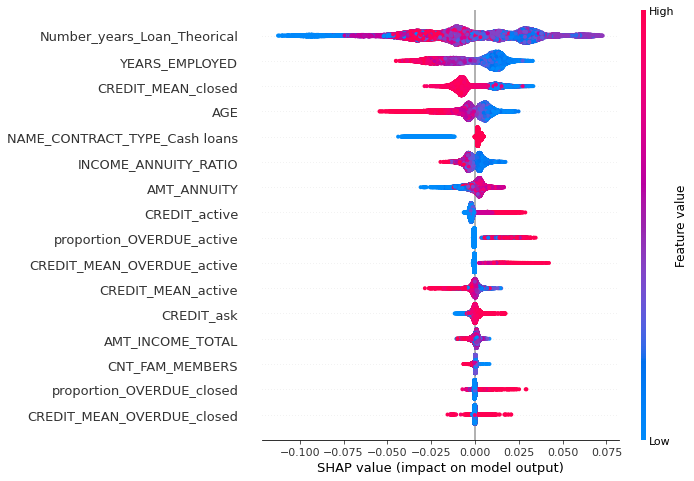

In [122]:
shap.summary_plot(shap_values, Xtest[feat].to_numpy(), feature_names=feat)

In [124]:
figure = plt.gcf()
shap.summary_plot(shap_values, Xtest[feat], feature_names=feat, show=False)
figure.set_size_inches(8, 8)
#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig(fname = "temp.jpg", dpi = 100, pad_inches = 0, bbox_inches='tight')
plt.close()

In [126]:
accepted_customer = np.where(new_mdl.predict(Xtest[feat]) == 0)[0][0]
ind = accepted_customer

figure = plt.gcf()
shap.force_plot(
    explainer.expected_value, np.round(shap_values, 5)[ind,:], np.round(Xtest[feat].to_numpy(),3)[ind,:],
    feature_names=feat, show=False, matplotlib=True
)
figure.set_size_inches(8, 8)

plt.savefig("temp2.jpg", dpi = 100, pad_inches = 0, bbox_inches='tight')
plt.close()

<Figure size 576x576 with 0 Axes>

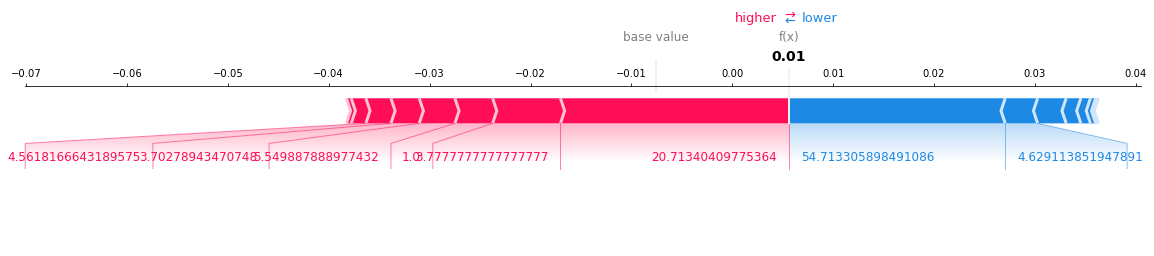

In [128]:
shap.force_plot(explainer.expected_value, shap_values[0,:], 
    Xtest[feat].to_numpy()[0,:],show=False, matplotlib=True).savefig('scratch.png')

In [130]:
accepted_customer = np.where(new_mdl.predict(Xtest[feat].to_numpy()) == 0)[0][0]
ind = accepted_customer
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], Xtest[feat].to_numpy()[ind,:],
    feature_names=feat
)

In [131]:
pickle.dump(explainer, open('explainer_shap_tree', 'wb'))
pickle.dump(new_mdl, open("tree_decision", 'wb'))


In [135]:
Xtest.to_csv("register_customer_test.csv", index = False)

In [ ]:
test = pickle.load(open('tree_decision', 'rb'))
test

In [ ]:
tmp = pd.read_csv("../test_flask_plotly/data/customer_info.csv")
tmp

In [ ]:
mdl = pickle.load(open('../test_flask_plotly/data/tree_decision', 'rb'))
#mdl.predict(tmp)

In [ ]:
mdl.